### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  
**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
  
**3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.**   
  
3-a) \textbf{Beta}\ distribution으로 위의 \textbf{belief}\을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)
  
3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  
3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 

# 1번

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

thetas = np.linspace(0, 1, 1000)

a = [1,2,25]
b = [1,4,30]
n = [6,60]
y = [4,56]
m_1 = ['uninformative prior','weak prior','Strong prior']
m_2 = ['Weak likelihood','Strong likelihood']

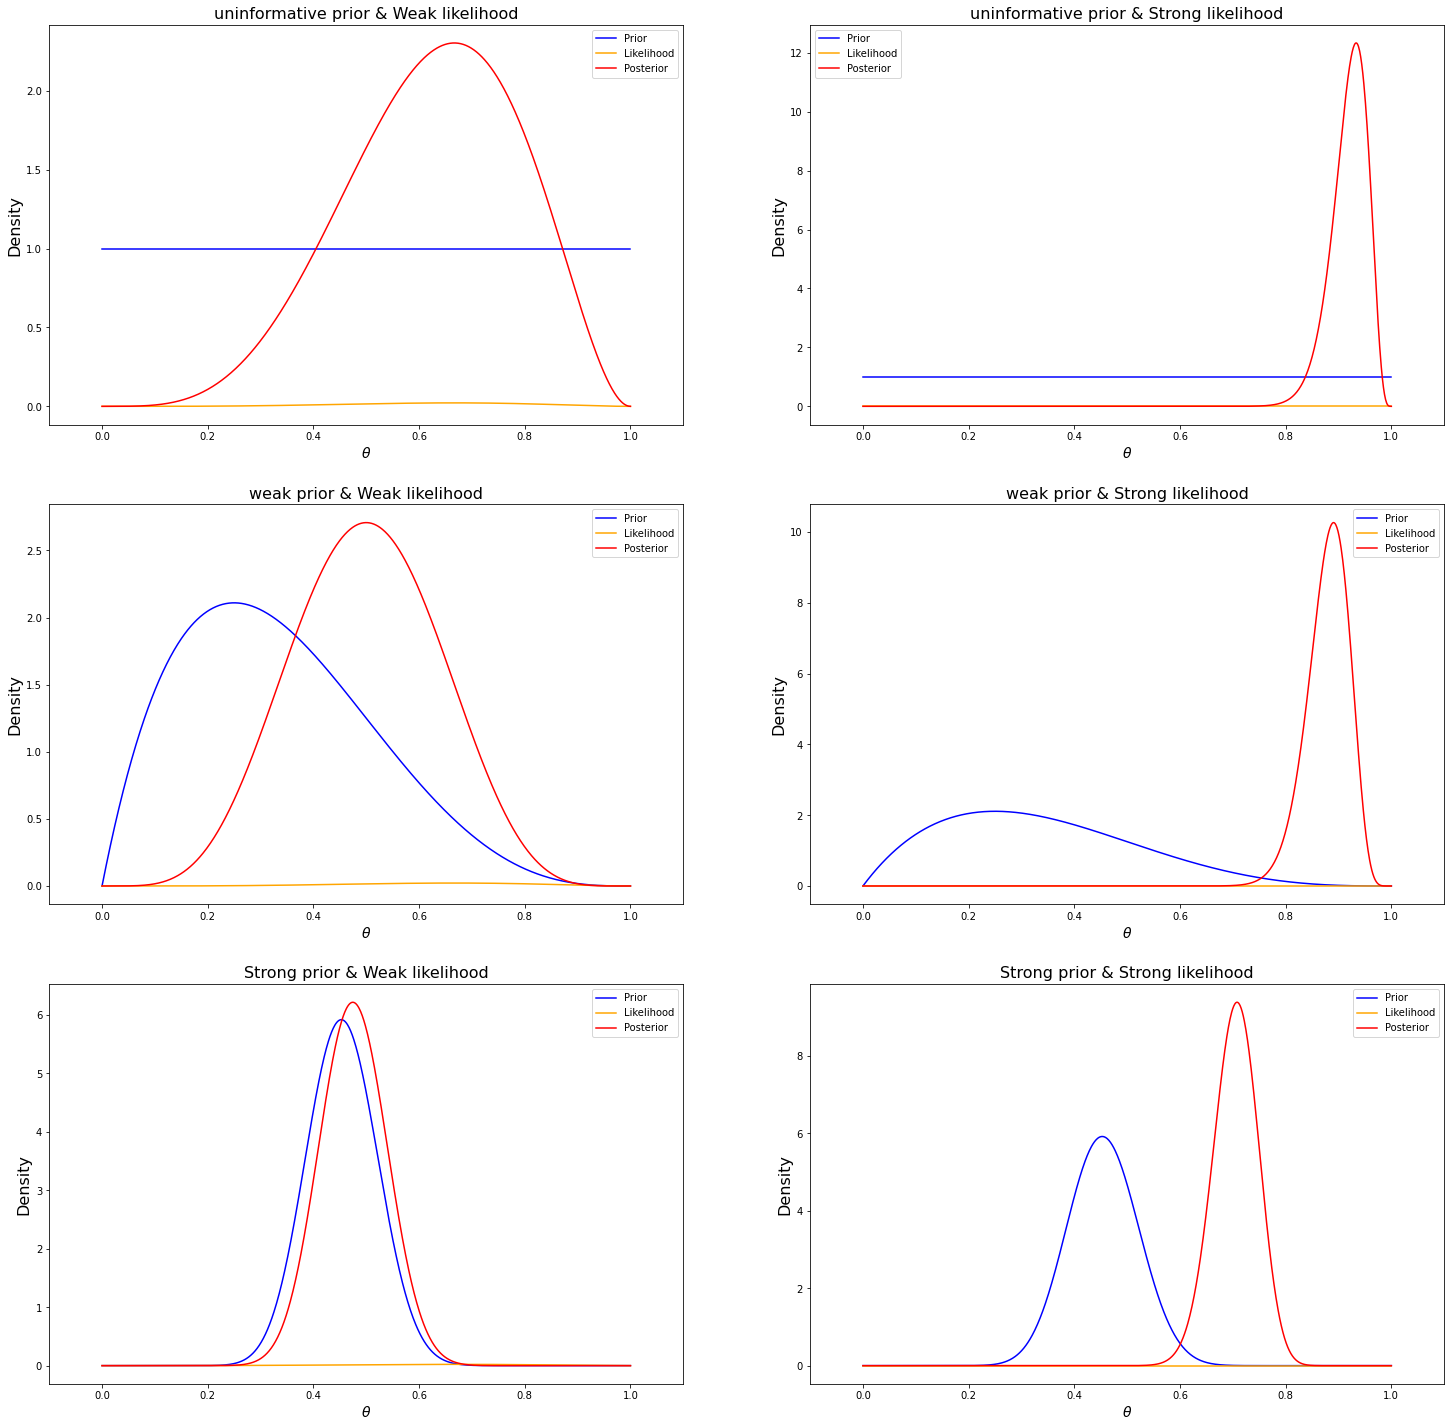

In [4]:
fig,ax = plt.subplots(3,2,figsize=(25,25))

for i in range(3):
    for j in range(2):
        ax[i,j].plot(thetas, st.beta(a[i], b[i]).pdf(thetas), label='Prior', c='blue')
        ax[i,j].plot(thetas, likelihood(thetas, n[j], y[j]), label='Likelihood', c='orange')
        ax[i,j].plot(thetas, st.beta(a=a[i]+y[j], b=b[i]+(n[j]-y[j])).pdf(thetas), label='Posterior', c='red')
        ax[i,j].set_xlim([-0.10, 1.10])
        ax[i,j].set_title(m_1[i]+' & '+m_2[j],fontsize=16)
        ax[i,j].set_xlabel(r'$\theta$', fontsize=14)
        ax[i,j].set_ylabel('Density', fontsize=16)
        ax[i,j].legend()

# 2번

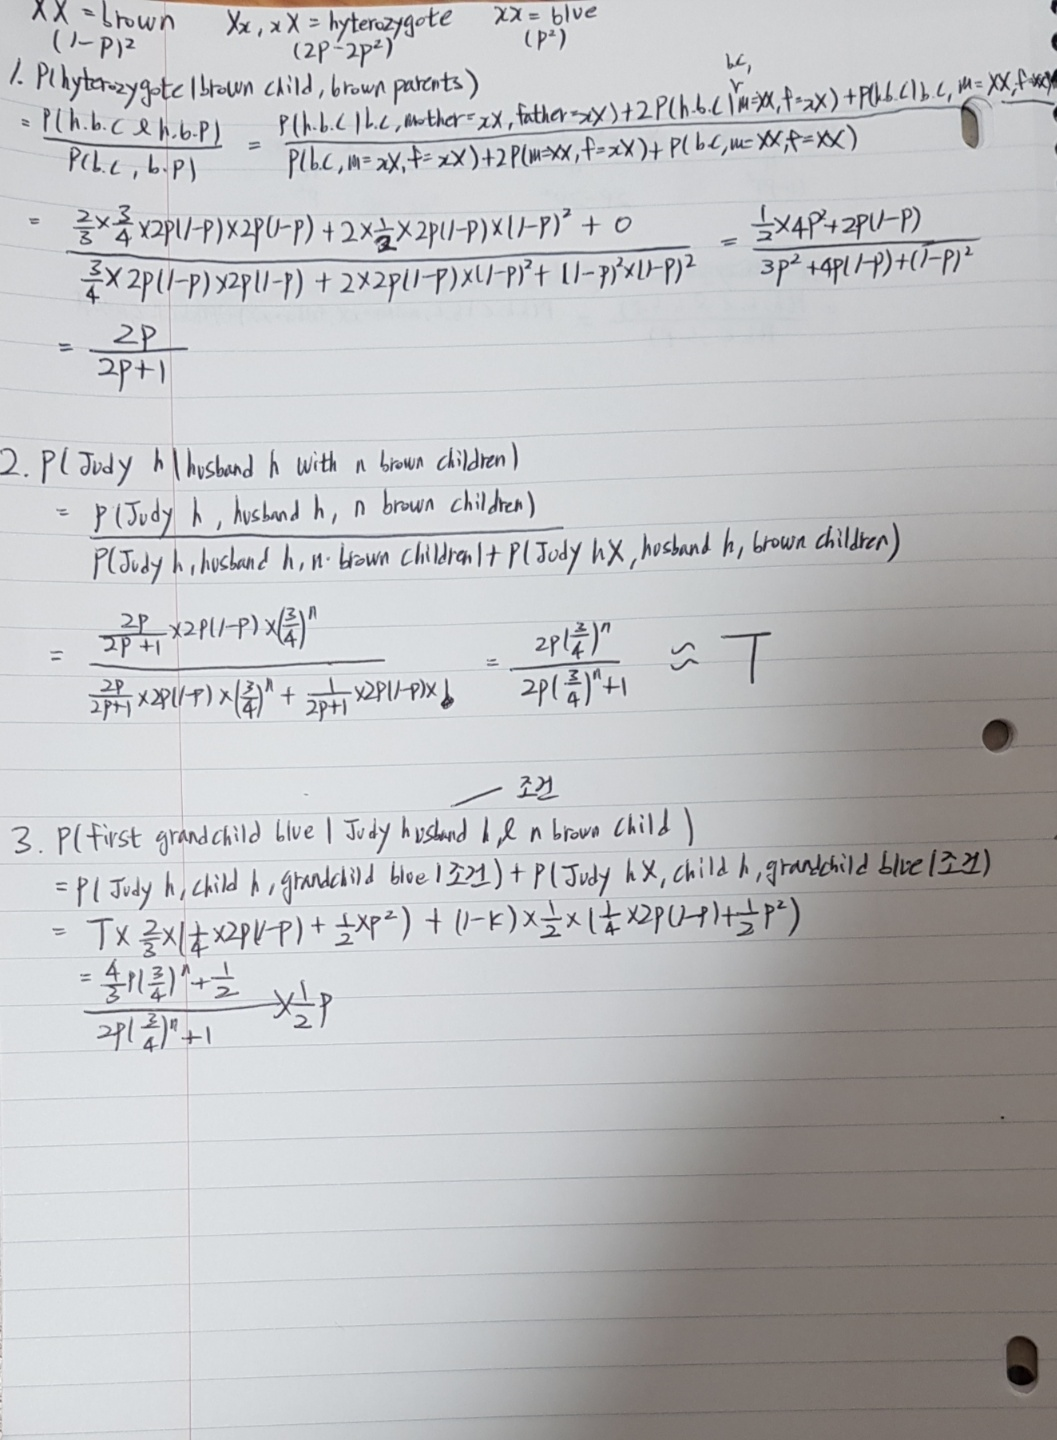

In [12]:
Image("C:/Users/rkdxo/Desktop/햑교/2021-1/ESC/week2/KakaoTalk_20210309_210417509.jpg")

# 3번

### a
베타 분포에서 a와 b의 비가 9:1이면 a = 9k, b = k이고 beta 분포의 평균은 a/(a+b)로 계산할 수 있으므로 0.9가 나옴을 확인할 수 있다. 이를 바탕으로 0.8미만 또는 0.97초과가 될 확률을 R을 통해서 계산해보았다.

P(a=18,b=2) ~ 0.193\
P(a=27,b=3) ~ 0.107\
P(a=36,b=4) ~ 0.062\
P(a=45,b=5) ~ 0.036

0.8미만 또는 0.97초과가 될 확률이 낮다는 것을 대표적인 유의수준인 0.05로 잡기위해 a,b를 각각 45와 5로 prior의 parameter를 잡았다.

Text(0.5, 1.0, 'Prior beta distribution')

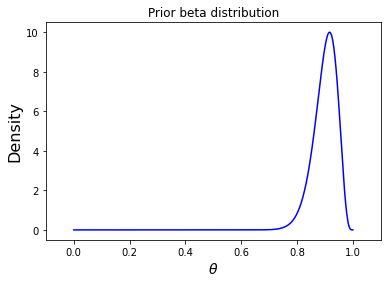

In [5]:
beta = st.beta(45, 5)

thetas = np.linspace(0, 1, 500)

plt.plot(thetas, beta.pdf(thetas), c='blue')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)

plt.title("Prior beta distribution")

### b
수술 이후를 (생존, 사망) 두 가지로 구분하고 각 상황의 확률이 constant하다고 가정하면 binomial distribution을 따른다고 할 수 있다. 그렇다면 posterior distribution은 beta distribution을 따를 것이다.
10명 모두 생존 -> n=10, y=10으로 해서 posterior로 update해주면 된다. 이때의 모수 a,b는 각각 55와 5이다.

Text(0.5, 1.0, 'Posterior beta distribution')

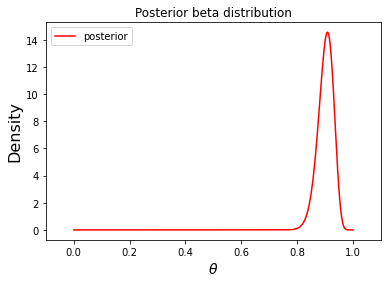

In [7]:
beta1 = st.beta(101, 11)

thetas = np.linspace(0, 1, 500)

plt.plot(thetas, beta1.pdf(thetas),label='posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

plt.title("Posterior beta distribution")

### c

In [8]:
!pip install IPython 
from IPython.display import Image

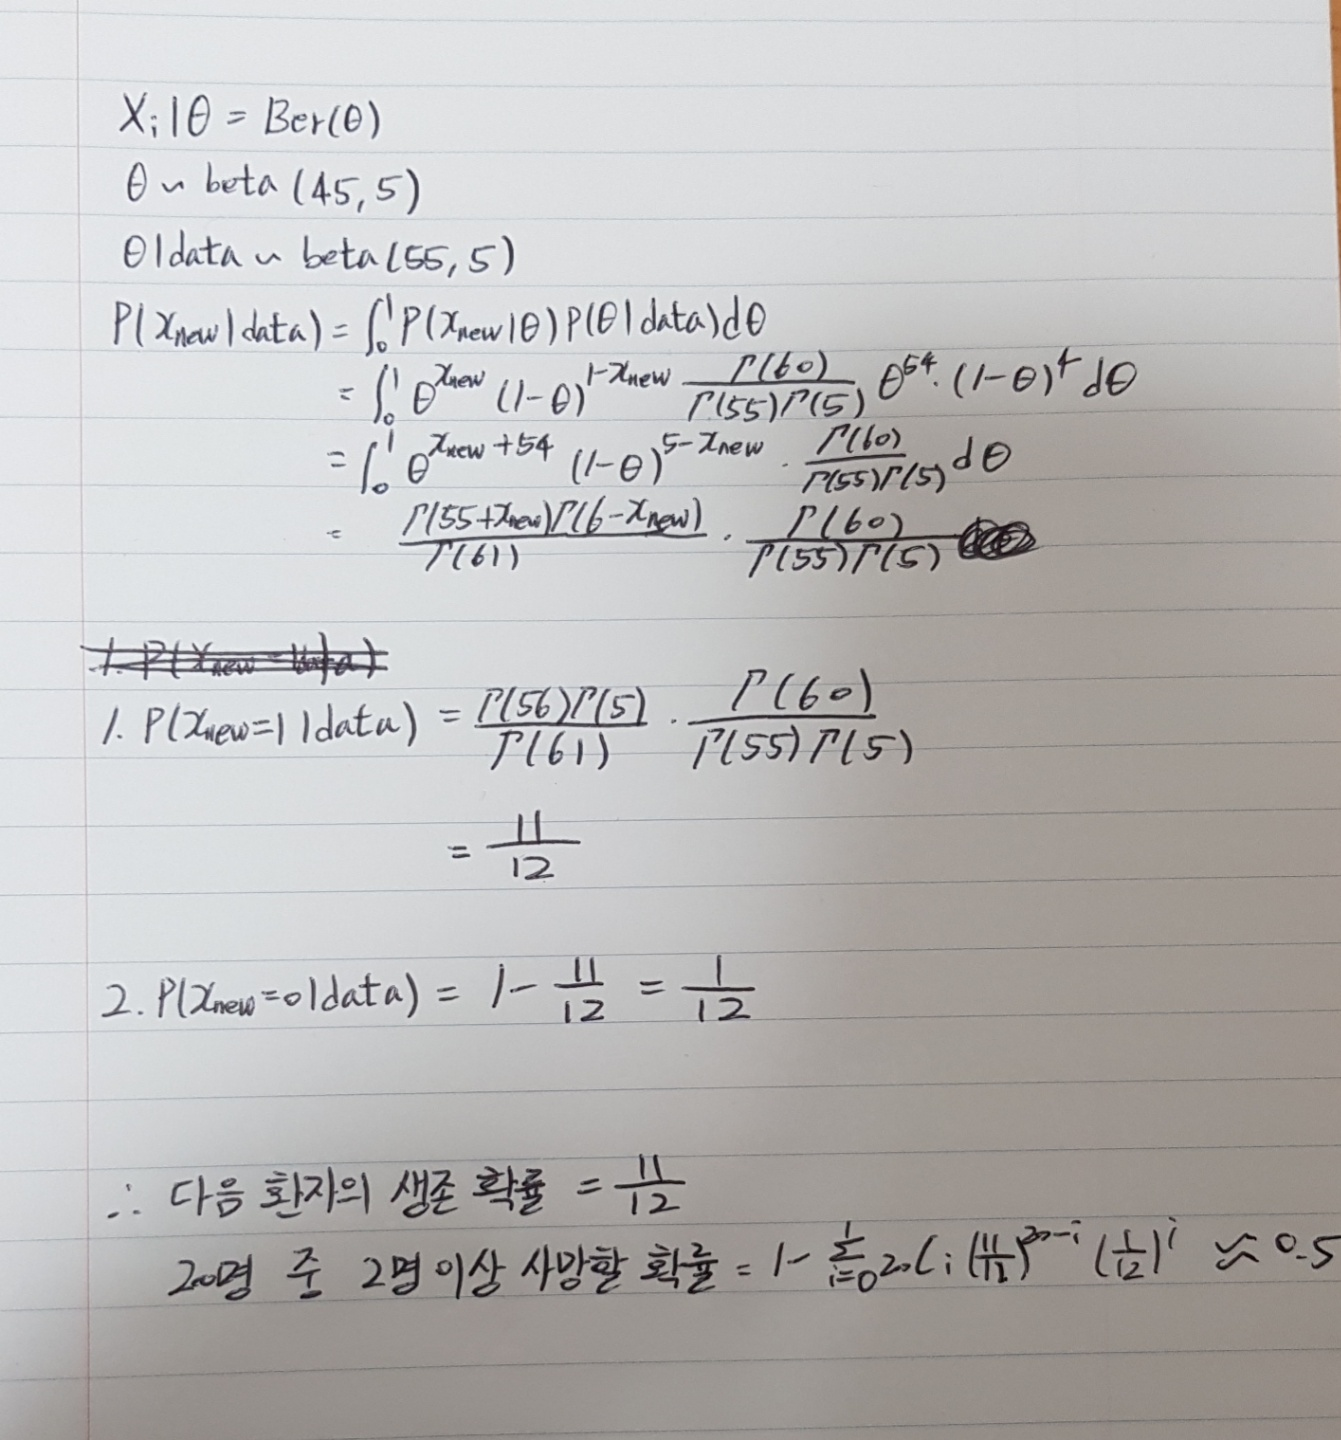

In [9]:
Image("C:/Users/rkdxo/Desktop/햑교/2021-1/ESC/week2/KakaoTalk_20210309_210417509_01.jpg")